# Linear Regression for Time Series Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
import pandas as pd
df = pd.read_csv('DFI-final_df_no_duplication.csv',delimiter='|')
df.head()

,Unnamed: 0,Unnamed: 0.1,img,product_Type,All_Text,TimeSeries_price,TimeSeries_Date,TimeSeries_price_log,TimeSeries_price_MinMaxScaler,TimeSeries_price_Standardized
0,0,21,foa_06082307_3053_1.jpg,generalforsale,vintage sharif purse if you are reading this l...,60.141,1,4.113183,0.239475,-0.680611
1,1,20,hsa_07080320_8694_1.jpg,householditems,ceiling mounted light fixture works great. com...,160.285,1,5.083173,0.376695,0.064157
2,2,12,hsa_07080320_8686_1.jpg,householditems,kitchen gadgets assorted kitchen gadgets and a...,159.379,1,5.077540,0.375898,0.059832
3,3,27,foa_06082307_3098_1.jpg,generalforsale,case of libbey 155 1 34 oz spirit dessert shot...,59.550,1,4.103469,0.238101,-0.688069
4,4,4,ela_07080117_5711_1.jpg,electronics,xbox 360 game system xbox 360 game system cond...,102.188,1,4.636553,0.313513,-0.278763


In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #print(a)
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #print(dataY)
    return np.array(dataX), np.array(dataY)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

def linear_regression(train,test, look_back, verbose, show_plt):
    
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    linear_regressor = LinearRegression()
    # fit the data
    linear_regressor.fit(trainX, trainY)
    
    # saving the model
    filename = 'linear_regression_model.sav'
    joblib.dump(linear_regressor, filename)
    # make predictions
    trainPredict = linear_regressor.predict(trainX)
    testPredict = linear_regressor.predict(testX)
    
    
    trainPredict = trainPredict.reshape(-1,1)
    testPredict = testPredict.reshape(-1,1)
    #print("shape of trainpredict ", trainPredict.shape)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Linear_Regression Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Linear_Regression Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    
    
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')

In [36]:
# plot baseline and predictions
def plot_data():
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')    

car & truck
Linear_Regression Train Score: 0.94 RMSE
Linear_Regression Test Score: 0.90 RMSE


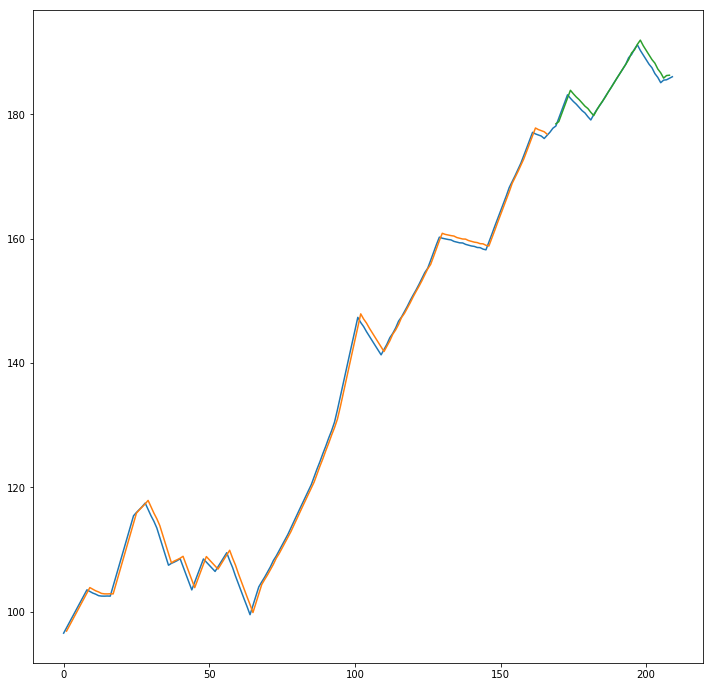



Linear_Regression Train Score: 0.94 RMSE
Linear_Regression Test Score: 0.90 RMSE


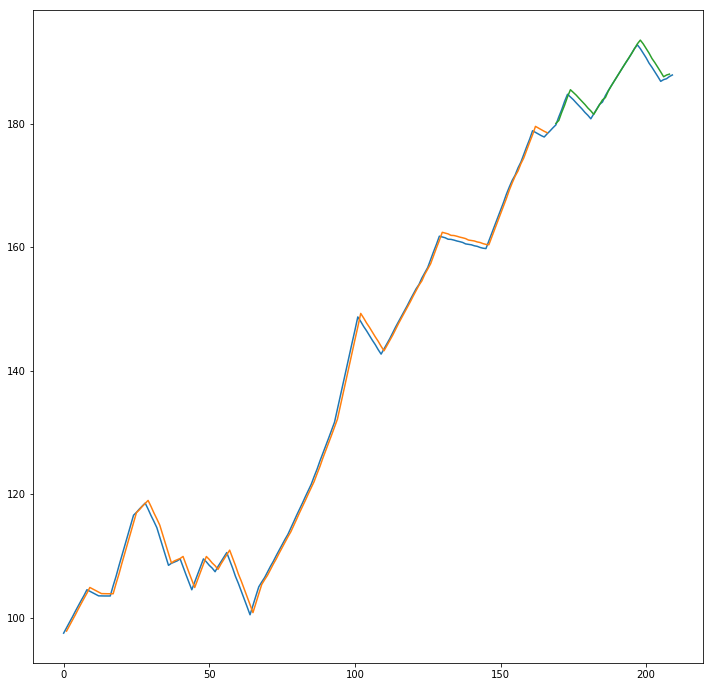

In [37]:
for pt in df.product_Type.unique()[5:6]:
    print('===================\n%s\n==================='%pt)
    single_pt_df = df[df['product_Type']==pt].groupby(['TimeSeries_Date']).agg({"TimeSeries_price":['min','max']})
    single_pt_df = single_pt_df.reset_index()
    single_pt_df.columns = ['time_point','min','max']
    single_pt_df['range'] = single_pt_df['max'] - single_pt_df['min']
        
    # print(single_pt_df,'*'*80,'\n\n\n')
        
    cols_name = ['min','max','range']
    for col in cols_name[:2]:
        dataset = single_pt_df[col].values.astype('float32').reshape(-1,1)
        # normalize the dataset , to the range of 0-to-1
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        #print(dataset[:10])
        train_size = int(len(dataset) * 0.8)
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        #print((train).shape, len(test))
        
        verbose = 0
        show_plt = 1
        #print(len(trainX))
        #print(len(trainX[0]))
        linear_regression(train, test, look_back = 1,verbose= verbose, show_plt = show_plt)

        #logistic_regression(single_pt_df[col], look_back = 1,verbose= verbose, show_plt = show_plt)